In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

inc_updrs_sigfall = pd.read_csv('./working_data/normalised_increase_updrs_sigfall.csv')

In [ ]:
# ------------ inc_updrs_sigfall data ----------------

In [67]:
# Create a model for each of the 3 solvers
# Solver 1 : Singular value decomposition

svd_auc_scores = []
svd_model = LinearDiscriminantAnalysis()
for n in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(inc_updrs_sigfall.iloc[:, :-1], inc_updrs_sigfall.iloc[:, -1], test_size=0.1)
    y_score = svd_model.fit(X_train, y_train).decision_function(X_test)
    svd_auc_scores.append(roc_auc_score(y_test.ravel(), y_score.ravel()))

#svd_auc_scores

In [18]:
# Solver 2 : Least squares solution

lsqr_auc_scores = []
lsqr_model = LinearDiscriminantAnalysis(solver="lsqr")
for n in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(inc_updrs_sigfall.iloc[:, :-1], inc_updrs_sigfall.iloc[:, -1], test_size=0.1)
    y_score = svd_model.fit(X_train, y_train).decision_function(X_test)
    lsqr_auc_scores.append(roc_auc_score(y_test.ravel(), y_score.ravel()))
    
    

In [20]:
# Solver 3 : Eigenvalue decomposition

eigen_auc_scores = []
eigen_model = LinearDiscriminantAnalysis(solver="eigen")
for n in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(inc_updrs_sigfall.iloc[:, :-1], inc_updrs_sigfall.iloc[:, -1], test_size=0.1)
    y_score = eigen_model.fit(X_train, y_train).decision_function(X_test)
    eigen_auc_scores.append(roc_auc_score(y_test.ravel(), y_score.ravel()))

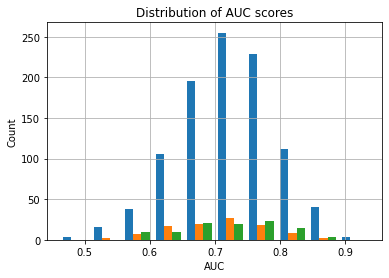

In [72]:
import matplotlib.pyplot as plt


n, bins, patches = plt.hist([svd_auc_scores,lsqr_auc_scores,eigen_auc_scores], bins=10)

plt.xlabel('AUC')
plt.ylabel('Count')
plt.title('Distribution of AUC scores')
plt.grid(True)
plt.show()

In [68]:
print('--- svd ---')
print(pd.Series(svd_auc_scores).describe())
print('\n--- eigen ---')
print(pd.Series(eigen_auc_scores).describe())
print('\n--- lsqr ---')
print(pd.Series(lsqr_auc_scores).describe())


--- svd ---
count    1000.000000
mean        0.723549
std         0.072060
min         0.461423
25%         0.681067
50%         0.725747
75%         0.774945
max         0.937951
dtype: float64

--- eigen ---
count    100.000000
mean       0.721144
std        0.074358
min        0.561841
25%        0.664016
50%        0.721577
75%        0.776050
max        0.867117
dtype: float64

--- lsqr ---
count    100.000000
mean       0.705260
std        0.071459
min        0.521795
25%        0.650563
50%        0.718058
75%        0.754160
max        0.869935
dtype: float64


In [59]:
# svd appears most accurate for this data


# ------------ inc_updrs_sigfall_raw data ----------------

In [69]:
inc_updrs_sigfall_raw = pd.read_csv('./working_data/normalised_increase_updrs_sigfall_raw.csv')

# Solver 1 : Singular value decomposition

raw_svd_auc_scores = []
raw_svd_model = LinearDiscriminantAnalysis()
for n in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(inc_updrs_sigfall_raw.iloc[:, :-1], inc_updrs_sigfall_raw.iloc[:, -1], test_size=0.1)
    y_score = raw_svd_model.fit(X_train, y_train).decision_function(X_test)
    raw_svd_auc_scores.append(roc_auc_score(y_test.ravel(), y_score.ravel()))
    
    
pd.Series(raw_svd_auc_scores).describe()

count    1000.000000
mean        0.706029
std         0.075129
min         0.438645
25%         0.656136
50%         0.710068
75%         0.757883
max         0.907967
dtype: float64

In [71]:
# Conclusions:
# inc_updrs_sigfall > inc_updrs_sigfall_raw
# Optimum model is svd_model


125     1.0
205     0.0
369     0.0
520     0.0
26      0.0
       ... 
1248    0.0
1131    0.0
684     0.0
1063    0.0
517     0.0
Name: SIGFALL, Length: 1462, dtype: float64